In [4]:
import numpy as np
from obspy.core import Trace
import pandas as pd
from obspy import read
import matplotlib.pyplot as plt
import os

In [5]:
# hago un placeholder del dataframe para cuando me pasen el posta

# Load the CSV file into a DataFrame
df = pd.read_csv(r'C:\Users\48389918\Downloads\space_apps_2024_seismic_detection\data\lunar\training\data\S12_GradeA\xa.s12.00.mhz.1970-03-25HR00_evid00003.csv')


In [4]:
#paso el dataframe por un filtro de butterworth
def butterworth(df,lowcut,highcut,fs,order):
    from scipy.signal import butter, lfilter
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    for i in range(0,df.shape[1]):
        df.iloc[:,i] = lfilter(b, a, df.iloc[:,i])



In [5]:
# defino la funcion de fourier
def fourier_transform(tr):
    # tomo el largo de la señal
    n = len(tr.data)
    # tomo la frecuencia de muestreo
    f_s = tr.stats.sampling_rate
    # tomo el periodo de muestreo
    T = 1/f_s
    # tomo la transformada de fourier
    f_values = np.linspace(0.0, 1.0/(2.0*T), n//2)
    fft_values_ = np.fft.fft(tr.data)
    fft_values = 2.0/n * np.abs(fft_values_[0:n//2])
    return f_values, fft_values


# defino la funcion de plot
def plot_fourier_transform(tr):
    f_values, fft_values = fourier_transform(tr)
    plt.plot(f_values, fft_values, linestyle='-', color='blue')
    plt.xlabel('Frequency [Hz]', fontsize=16)
    plt.ylabel('Amplitude', fontsize=16)
    plt.title("Fourier transform", fontsize=16)
    plt.show()

#defino filtro de pasa bajos
def low_pass_filter(tr, freq, freq2):
    tr_filt = tr.copy()
    tr_filt.filter('lowpass', freq=freq, corners=2, zerophase=True)
    tr_filt.filter('highpass', freq=freq2, corners=2, zerophase=True)
    return tr_filt

#inversa de fourier
def inverse_fourier_transform(tr):
    tr_inv = tr.copy()
    tr_inv.data = np.fft.ifft(tr.data)
    return tr_inv

#defino la funcion de plot
def plot_inverse_fourier_transform(tr):
    tr_inv = inverse_fourier_transform(tr)
    plt.plot(tr_inv.times(), tr_inv.data, linestyle='-', color='blue')
    plt.xlabel('Time [s]', fontsize=16)
    plt.ylabel('Amplitude', fontsize=16)
    plt.title("Inverse Fourier transform", fontsize=16)
    plt.show()




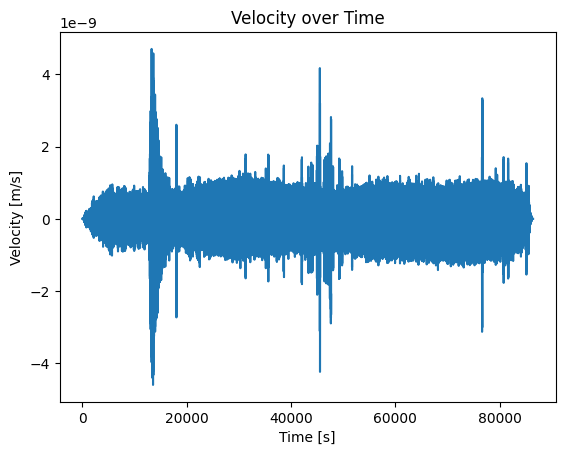

In [6]:
# Plot the DataFrame
plt.plot(df['time_rel(sec)'], df['velocity(m/s)'])
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Velocity over Time')
plt.show()

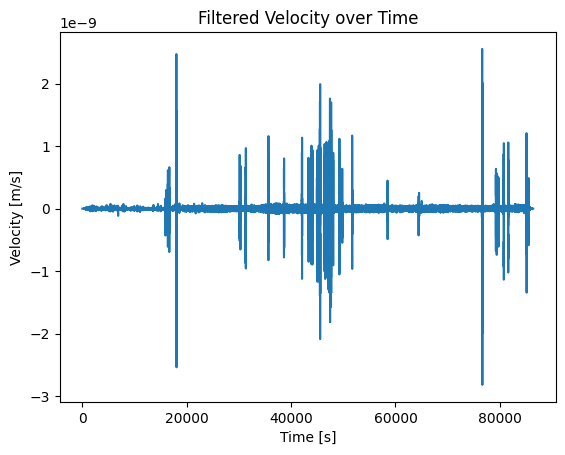

In [7]:
# Apply the low-pass filter to the DataFrame
tr = Trace(data=df['velocity(m/s)'].values)
tr.stats.sampling_rate = 1 / (df['time_rel(sec)'][1] - df['time_rel(sec)'][0])
filtered_tr = low_pass_filter(tr, freq=0.1, freq2=0.01)

# Plot the filtered DataFrame
plt.plot(df['time_rel(sec)'], filtered_tr.data)
plt.xlabel('Time [s]')
plt.ylabel('Velocity [m/s]')
plt.title('Filtered Velocity over Time')
plt.show()

KeyboardInterrupt: 

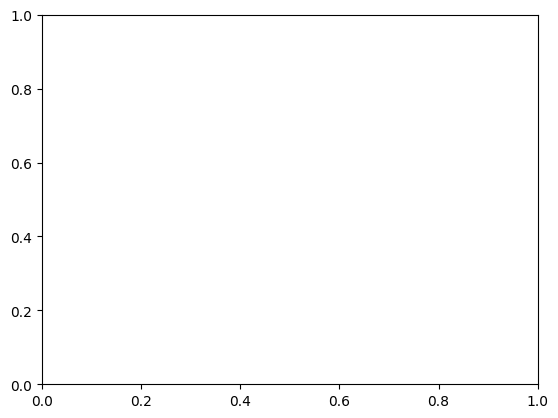

In [7]:
# Suponiendo que tienes la señal en una lista 'signal' y la tasa de muestreo en 'fs'
signal = [df['velocity(m/s)'].values]
fs = 100  # Ejemplo: tasa de muestreo 100 Hz
N = len(signal)

# Aplicar la FFT
fft_output = np.fft.fft(signal)
freqs = np.fft.fftfreq(N, 1/fs)

# Graficar el espectro de frecuencias
plt.plot(freqs[:N//2], np.abs(fft_output[:N//2]))  # Solo frecuencias positivas
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Amplitud')
plt.show()
